# Tutorial 1 (Week 1) - Data Visualization using Matplotlib and Seaborn

## Learning Objectives
After completing this tutorial, students should be able to:
+ Load and inspect datasets using pandas library
+ Visualize data using Matplotlib
    + Describe parts of a Matplotlib figure
    + Create plots of various types (e.g., line plots, scatter plots) using pyplot
+ Visualize data using Seaborn
    + Create plots using axes-level and figure-level functions in Seaborn
    + Visualize statistical relationships
    + Visualize distributions
    + Visualize categorical data

This tutorial references content from the [Matplotlib tutorial](https://matplotlib.org/stable/tutorials/index.html) and [seaborn tutorial](https://seaborn.pydata.org/tutorial.html).

# Loading and Inspecting Datasets

We will work with the dataset of [Broadway Shows](https://www.kaggle.com/datasets/mexwell/broadway-shows), which is available in csv (comma-separated values) format from Kaggle. 

For your convenience, the cleaned data file ("broadway_clean.csv") has been uploaded on Canvas along with this notebook. Please take some time to understand this dataset by going through the Data Dictionary at the above link, as it will help you appreciate the objectives of the various visualizations we are going to create.

[pandas (Python Data Analysis Library)](https://pandas.pydata.org/) provides convenient functions to work with data in Python. The most-used data structure in pandas is `DataFrame`, which is essentially a table representation of the data.

We use the function `read_csv()` to load our Broadway Shows data into a `DataFrame` variable.

After loading the data, it is common to grab the first few rows of the resulting table to see what the dataset looks like.

In [2]:
import pandas as pd

shows = pd.read_csv( "broadway_clean.csv" )
shows.head()

,Date.Day,Date.Full,Date.Month,Date.Year,Show.Name,Show.Theatre,Show.Type,Statistics.Attendance,Statistics.Capacity,Statistics.Gross,Statistics.Gross Potential,Statistics.Performances
0,3,10/3/2004,10,2004,Marc Salem'S Mind Games,Lyceum,Special,73,10,3668,10,1
1,1,11/1/1998,11,1998,A Mom'S Life,Belasco,Special,134,13,3822,12,1
2,9,3/9/2003,3,2003,Urban Cowboy,Broadhurst,Musical,748,13,39937,8,0
3,2,5/2/2004,5,2004,Prymate,Longacre,Play,1140,13,37246,7,0
4,18,9/18/2005,9,2005,Latinologues,Helen Hayes,Play,621,13,31790,13,0


There are various `DataFrame` properties you can query to inspect the data. For instance, `shape` gives you the dimension of the data table in the form of `(num_of_rows, num_of_columns)`. This can be useful to check that the whole dataset is properly loaded and no row / column is missed out from the file.

In [3]:
shows.shape

(29167, 12)

__EXERCISE:__

A few easy tasks to get you warmed up! Look up how to do the following for the Broadway Shows dataset, and fill up the code cells that are tagged with `TODO`.
1. Get the __last__ 8 rows.
2. Generate descriptive statistic summary of the dataset.
3. Select only the year, show name, and gross revenue columns.
4. Select only rows with filled capacity of 50% or more.

The guides on [pandas documentation page](https://pandas.pydata.org/docs/index.html) may come in handy!

In [4]:
# TODO: Get the last 8 rows 
shows.tail(8)

,Date.Day,Date.Full,Date.Month,Date.Year,Show.Name,Show.Theatre,Show.Type,Statistics.Attendance,Statistics.Capacity,Statistics.Gross,Statistics.Gross Potential,Statistics.Performances
29159,26,6/26/2016,6,2016,The King And I 2015,Vivian Beaumont,Musical,8370,100,840824,73,8
29160,26,6/26/2016,6,2016,The Lion King,Minskoff,Musical,13570,100,2113062,100,8
29161,3,7/3/2016,7,2016,The Lion King,Minskoff,Musical,13573,100,2164298,101,8
29162,3,7/3/2016,7,2016,Waitress,Brooks Atkinson,Musical,8324,100,1010938,99,8
29163,17,7/17/2016,7,2016,Waitress,Brooks Atkinson,Musical,8360,100,1068393,105,8
29164,24,7/24/2016,7,2016,Waitress,Brooks Atkinson,Musical,8332,100,1071704,105,8
29165,7,8/7/2016,8,2016,The Lion King,Minskoff,Musical,13558,100,2292428,97,8
29166,14,8/14/2016,8,2016,Les Miserables '14,Imperial,Musical,11244,100,1035397,88,8


In [5]:
# TODO: Generate descriptive statistic summary of the dataset
shows.describe()

,Date.Day,Date.Month,Date.Year,Statistics.Attendance,Statistics.Capacity,Statistics.Gross,Statistics.Gross Potential,Statistics.Performances
count,29167.000000,29167.000000,29167.000000,29167.000000,29167.000000,2.916700e+04,29167.000000,29167.000000
mean,15.661810,6.495594,2005.880413,7826.851956,79.073199,5.652896e+05,60.021737,7.193095
std,8.796249,3.439284,6.043321,3142.484713,15.950002,3.628703e+05,26.669518,2.278224
min,1.000000,1.000000,1990.000000,73.000000,10.000000,3.668000e+03,0.000000,0.000000
25%,8.000000,4.000000,2001.000000,5362.000000,69.000000,3.066600e+05,44.000000,8.000000
50%,16.000000,6.000000,2006.000000,7555.000000,81.000000,4.895880e+05,61.000000,8.000000
75%,23.000000,10.000000,2011.000000,10160.000000,92.000000,7.331910e+05,78.000000,8.000000
max,31.000000,12.000000,2016.000000,21631.000000,100.000000,3.201333e+06,226.000000,16.000000


In [6]:
# TODO: Select only the year, show name, and gross revenue columns
shows[['Date.Year','Show.Name','Statistics.Gross']]

,Date.Year,Show.Name,Statistics.Gross
0,2004,Marc Salem'S Mind Games,3668
1,1998,A Mom'S Life,3822
2,2003,Urban Cowboy,39937
3,2004,Prymate,37246
4,2005,Latinologues,31790
...,...,...,...
29162,2016,Waitress,1010938
29163,2016,Waitress,1068393
29164,2016,Waitress,1071704
29165,2016,The Lion King,2292428


In [7]:
# TODO: Select only rows with filled capacity of 50% or more
shows.loc[shows['Statistics.Capacity'] > 50, : ]

,Date.Day,Date.Full,Date.Month,Date.Year,Show.Name,Show.Theatre,Show.Type,Statistics.Attendance,Statistics.Capacity,Statistics.Gross,Statistics.Gross Potential,Statistics.Performances
1595,27,11/27/1994,11,1994,The Shadow Box,Circle In The Square,Play,2933,51,75918,34,8
1596,9,7/9/1995,7,1995,Arcadia,Vivian Beaumont,Play,4367,51,160324,46,8
1597,28,4/28/1996,4,1996,A Midsummer Night'S Dream,Lunt-Fontanne,Play,5936,51,276763,47,8
1598,28,4/28/1996,4,1996,An Ideal Husband,Ethel Barrymore,Play,2810,51,76744,19,0
1599,5,5/5/1996,5,1996,A Midsummer Night'S Dream,Lunt-Fontanne,Play,5891,51,239147,40,8
...,...,...,...,...,...,...,...,...,...,...,...,...
29162,3,7/3/2016,7,2016,Waitress,Brooks Atkinson,Musical,8324,100,1010938,99,8
29163,17,7/17/2016,7,2016,Waitress,Brooks Atkinson,Musical,8360,100,1068393,105,8
29164,24,7/24/2016,7,2016,Waitress,Brooks Atkinson,Musical,8332,100,1071704,105,8
29165,7,8/7/2016,8,2016,The Lion King,Minskoff,Musical,13558,100,2292428,97,8


We are now ready to use the Broadway Shows dataset to do some data visualisations.

# Introduction to Matplotlib

Matplotlib is a Python plotting library that produces high-quality figures in a variety of formats and across platforms. 

Matplotlib graphs your data on __Figures__ (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more Axes (i.e., an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, or x-y-z in a 3D plot, etc.). 

Let us look at what makes up a Matplotlib Figure to get familiar with the terms.

<img src = "https://matplotlib.org/_images/anatomy.png" width="600"/>

## Introduction to Pyplot

The easiest way to create a new Figure is with pyplot. ```matplotlib.pyplot``` provides a collection of functions to work with a Figure, e.g. creating a Figure, creating a plotting area in a Figure, plotting lines, etc. 

For Jupyter notebooks, we set ```%matplotlib inline``` magic to output the plotting commands inline in our notebooks.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

## Basic Plot

Before we work with our dataset, let's get a feel of building a basic plot and setting the Figure components. 

As the following code shows, we can create several plots on the same graph. A line plot is created using `pyplot.plot` and a scatter plot is created using `pyplot.scatter`.

__EXERCISE:__

Explore the API references for [`pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) and [`pyplot.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to complete the `TODO` tasks below.

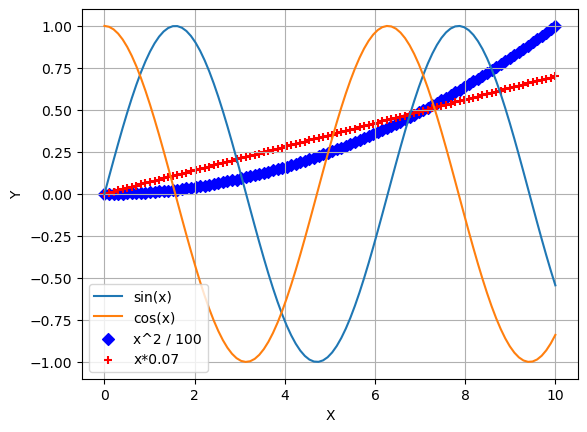

In [9]:
import numpy as np

# Generate 100 evenly spaced samples, calculated over the interval [0, 10].
x = np.linspace( 0, 10, 100 )  

# Create a line plot of sin(x) against x, and label it
plt.plot( x, np.sin(x), label="sin(x)" ) 

# TODO: Create a line plot of cos(x) against x, and label it
plt.plot(x, np.cos(x),  label="cos(x)")

# Create a scatter plot of (x^2 / 100) against x using blue diamond markers, and label it
plt.scatter( x, x*x/100, c="Blue", marker="D", label="x^2 / 100" )

# TODO: Create a scatter plot of (x * 0.07) against x using red '+' markers, and label it
plt.scatter(x, x*0.07, c="Red", marker="+", label = "x*0.07")

# Create a legend 
plt.legend() 

# Label the y and x axes
plt.ylabel( "Y" )
plt.xlabel( "X" )

# Configures grid lines to be visible
plt.grid( visible = True ) 

# Display the plot
plt.show()

Let us now create visualizations for the Broadway Shows dataset. 

### Line Plot

Line plots are useful to explore trends in the dataset. Let's try to see how the different variables change over the months in a year. 

To do this, we first aggregate the data by month.

In [10]:
# Aggregate using the mean function, for all variables with numeric values
showsByMonth = shows.groupby( "Date.Month", sort=True ).mean( numeric_only=True )
showsByMonth

,Date.Day,Date.Year,Statistics.Attendance,Statistics.Capacity,Statistics.Gross,Statistics.Gross Potential,Statistics.Performances
Date.Month,,,,,,,
1,15.587232,2006.526454,7995.206384,80.214254,596403.942282,62.442501,7.492348
2,14.648952,2006.214529,7671.932716,78.342272,536186.851780,58.110678,7.173086
3,16.337887,2006.220571,7752.380474,80.725994,538601.139815,58.366814,6.402170
4,15.657013,2006.083043,7679.646895,79.139916,535990.900907,58.241452,6.382066
5,15.623420,2006.104458,7595.654358,77.258483,536117.202595,57.754824,7.755489
6,14.933058,2005.767582,7830.039489,78.955622,561640.775103,59.813464,7.786010
7,15.723030,2005.936151,8424.386614,82.256275,616916.625716,63.545134,7.664905
8,15.704973,2005.583776,8558.758088,82.907774,632495.183969,65.670690,7.713182
9,15.933019,2005.415489,7749.560440,76.374673,552016.927786,56.500262,7.211408


Let's plot the mean attendance numbers over the months.

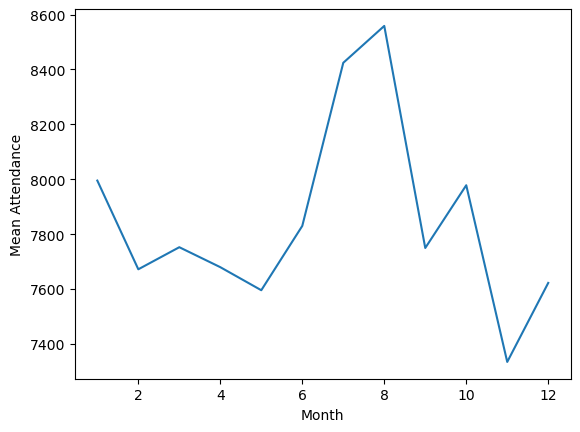

In [11]:
plt.plot( showsByMonth.index, showsByMonth['Statistics.Attendance'].values )

plt.xlabel( 'Month')
plt.ylabel( 'Mean Attendance' )

plt.show()

The plot suggests that the mean attendance of Broadway shows goes higher around summer months, which is reasonable.

__EXERCISE:__

Plot the mean gross revenue of shows grouped by year. Do you see any interesting trend of the gross revenue over the years? 

Is there any caveat when interpreting revenue data in real life?

In [12]:
# TODO: Plot the average gross revenue of shows grouped by year
showsByYear = shows.groupby( "Date.Year", sort=True ).mean( numeric_only=True )
showsByYear

,Date.Day,Date.Month,Statistics.Attendance,Statistics.Capacity,Statistics.Gross,Statistics.Gross Potential,Statistics.Performances
Date.Year,,,,,,,
1990,26.000000,8.000000,5500.000000,88.000000,134456.000000,0.000000,8.000000
1991,19.000000,4.142857,11474.571429,98.428571,617369.571429,0.000000,4.000000
1992,15.890909,7.363636,10970.236364,89.981818,528241.963636,28.163636,7.436364
1993,15.932584,6.955056,10725.067416,93.876404,473053.303371,41.808989,7.775281
1994,15.523810,6.945578,10151.170068,82.217687,471066.537415,14.428571,7.149660
1995,15.323907,7.015424,9626.102828,84.552699,475442.616967,18.200514,7.215938
1996,15.641055,7.956422,7786.663991,79.774083,362503.027523,2.297018,7.138761
1997,15.883951,6.634568,7602.741564,78.603292,355827.800000,37.693004,7.158848
1998,15.398502,6.322097,7765.864419,77.767790,377492.664419,68.757303,7.323596


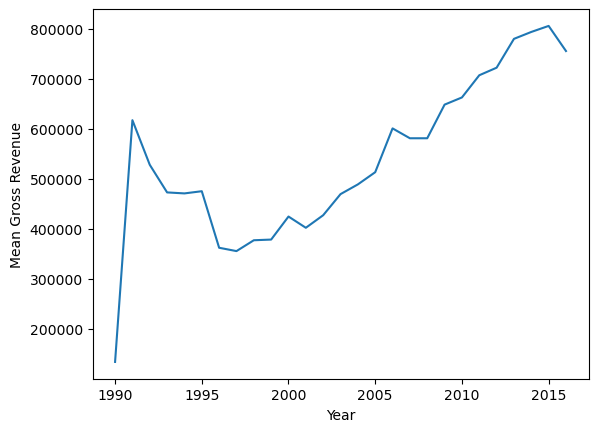

In [13]:
plt.plot(showsByYear.index, showsByYear['Statistics.Gross'].values)

plt.xlabel( 'Year')
plt.ylabel( 'Mean Gross Revenue' )

plt.show()

### Scatter Plot

Scatter plots are useful for observing the relationship between two variables. For example, we can use it to see how the gross revenue changes when the attendance numbers changes.

Here, we use `pyplot.subplots` to give us a way to plot multiple plots on a single figure, which will come into play later.

(984, 12)


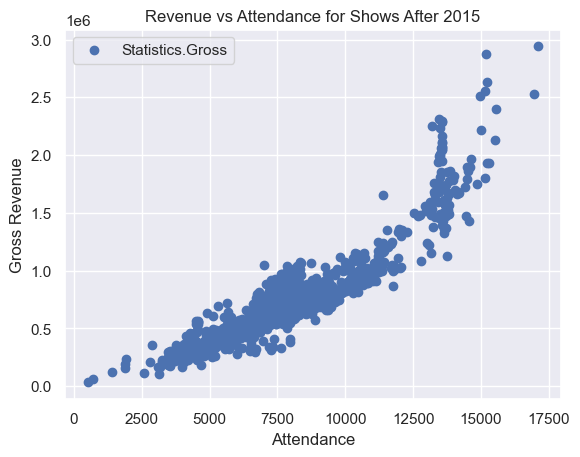

In [149]:
# subplots is a utility wrapper that makes it convenient to get Figure and Axes objects in a single call
fig, ax = plt.subplots()

# To better zoom into values, we take only a subset of the dataset, for shows in the years later than 2015
showsAfter2015 = shows[shows["Date.Year"] > 2015]
print(showsAfter2015.shape)

# Create a scatter plot using the Axes.scatter function
ax.scatter( 'Statistics.Attendance', 'Statistics.Gross', data=showsAfter2015 ) 

ax.set_xlabel( 'Attendance' )
ax.set_ylabel( 'Gross Revenue' )
ax.set_title( 'Revenue vs Attendance for Shows After 2015')

ax.legend()
ax.grid( True )

plt.show()

### Working with Multiple Plots

We can make the graph above more informative, for example, by using colors to differentiate whether the show is a Musical, a Play, or a Special.

This can be achieved by essentially creating one scatter plot for each show type, using a different color for each, all placed in a single Figure.

__EXERCISE:__

Complete the TODO tasks below.

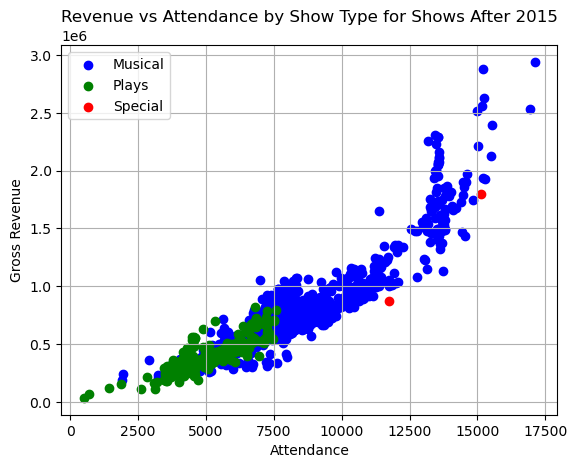

In [15]:
fig, ax = plt.subplots()

# For each subplot, we get the subset of data with the desired show type

# Create a blue scatter plot for Musicals
ax.scatter( 'Statistics.Attendance', 'Statistics.Gross', c="Blue", label="Musical", data=showsAfter2015[showsAfter2015["Show.Type"]=="Musical"] )

# TODO: Create a green scatter plot for Plays
ax.scatter( 'Statistics.Attendance', 'Statistics.Gross', c="green", label="Plays", data=showsAfter2015[showsAfter2015["Show.Type"]=="Play"] )

# TODO: Create a red scatter plot for Specials
ax.scatter( 'Statistics.Attendance', 'Statistics.Gross', c="Red", label="Special", data=showsAfter2015[showsAfter2015["Show.Type"]=="Special"] )

# Set title
ax.set_title( 'Revenue vs Attendance by Show Type for Shows After 2015')

# TODO: Set x label, y label, legend, and grid as before
ax.set_xlabel( 'Attendance' )
ax.set_ylabel( 'Gross Revenue' )

ax.legend()
ax.grid( True )

plt.show()

What if we have many categories? We can define arrays to map the categories and create the subplots in a loop. The following code uses a loop to create the same graph as the previous code.

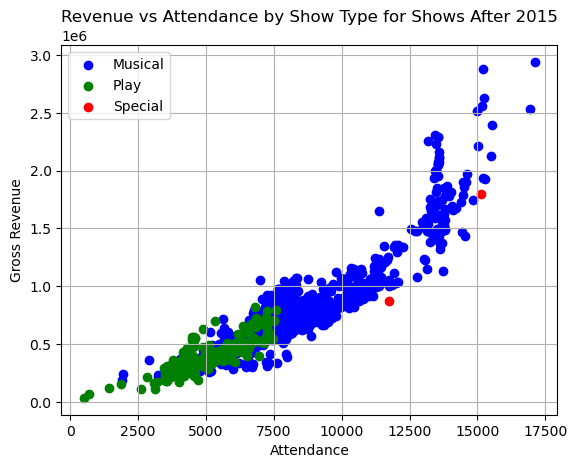

In [16]:
fig, ax = plt.subplots()

class_map = { "Musical":"Musical", "Play":"Play", "Special":"Special" }
colors = { "Musical":"Blue", "Play":"Green", "Special":"Red" }

for cls, c in colors.items():
    ax.scatter( 'Statistics.Attendance', 'Statistics.Gross', c=c, label=class_map[cls], data=showsAfter2015[showsAfter2015["Show.Type"]==cls] )
    
ax.set_xlabel( 'Attendance' )
ax.set_ylabel( 'Gross Revenue' )
ax.set_title( 'Revenue vs Attendance by Show Type for Shows After 2015')

ax.legend()
ax.grid( True )

plt.show()

__EXERCISE:__

Create scatter subplots to show how the gross revenue changes when the filled capacity changes, for five theatres with the largest number of show runs in the whole dataset. Use a loop to differentiate the theatres by color. 

How do the theatres differ in terms of capacity-revenue relationship?

The following code helps you find out which are the top five theatres.

In [17]:
shows['Show.Theatre'].value_counts().head()

Majestic      995
Broadway      985
Gershwin      979
Palace        934
Ambassador    921
Name: Show.Theatre, dtype: int64

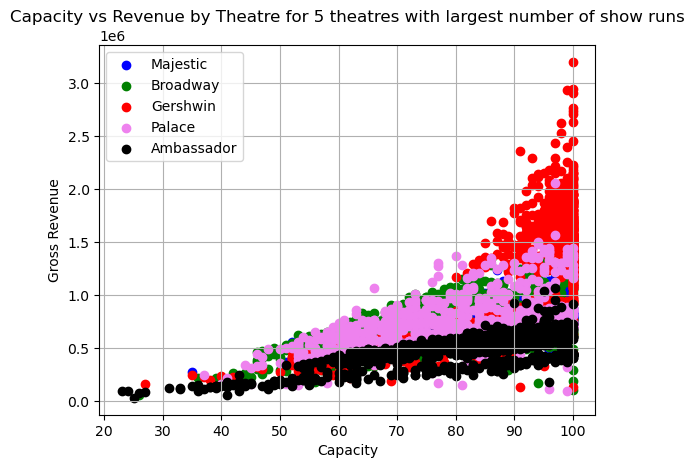

In [18]:
# TODO: Create a color-differentiated scatter plot of revenue vs capacity for the top five theatres
fig, bx = plt.subplots()

class_map = { "Majestic":"Majestic", "Broadway":"Broadway", "Gershwin":"Gershwin", "Palace":"Palace", "Ambassador":"Ambassador" }
colors = { "Majestic":"Blue", "Broadway":"Green", "Gershwin":"Red", "Palace":"Violet", "Ambassador":"Black"}

for cls, c in colors.items():
    bx.scatter('Statistics.Capacity','Statistics.Gross', c=c, label=class_map[cls], data=shows[shows['Show.Theatre']==cls])


bx.set_xlabel( 'Capacity' )
bx.set_ylabel( 'Gross Revenue' )
bx.set_title( 'Capacity vs Revenue by Theatre for 5 theatres with largest number of show runs')

bx.legend()
bx.grid( True )

plt.show()




### Bar Plot

Bar plots are useful to see counts of categorical variables. For instance, we can visualize the distribution of the different show types across all show runs. 

We first construct the {show type, count of show runs} table.

In [19]:
# Category type is needed here
showsByType = shows['Show.Type'].astype( "category" )
showsByType = showsByType.value_counts()
showsByType

Musical    20728
Play        8112
Special      327
Name: Show.Type, dtype: int64

We create a bar plot using the `pyplot.bar` function, specifying the x coordinates (categories) and the height of the bars (values). In our case, the categories are the show types, and the values are the count of show runs.

As with other Matplotlib plotting functions, `pyplot.bar` expects numpy arrays as inputs. We will need to convert our pandas data objects to `numpy.array` objects prior to plotting.

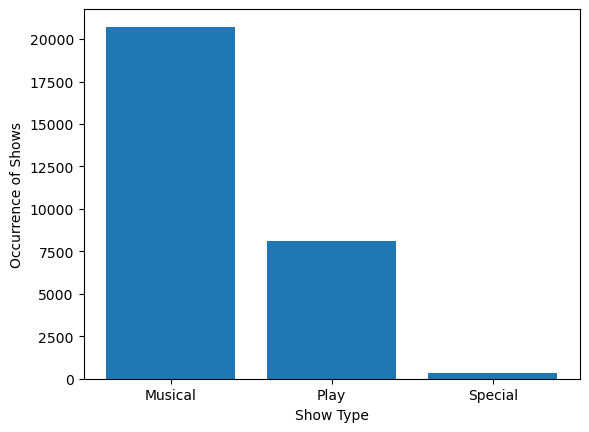

In [20]:
import numpy as np

# Create a numpy array for the categories
cat = np.array( showsByType.index.values )

# Convert the count table into a numpy array
ht = showsByType.to_numpy()

plt.bar( cat, ht )

plt.xlabel( "Show Type" )
plt.ylabel( "Occurrence of Shows" )

plt.show()

### Stacked Bar Plot

We can create a stacked bar plot using `pyplot.subplots`, essentially by drawing a plot on top of another.

__EXERCISE:__

Follow the logic in [this example from Matplotlib gallery](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py) to create a stacked bar plot of show types for two theatres: "Walter Kerr" and "Neil Simon".

The below TODO tasks give you the outline of the steps you will need.

The categories remain the same show types, but you will now have two count arrays, one for the "Walter Kerr" theatre and one for the "Neil Simon" theatre.

In [95]:
# TODO: 1. Obtain the subset of the dataset where the theatre is "Walter Kerr".
shows_Walter_Kerr = shows.loc[shows['Show.Theatre'] == 'Walter Kerr', : ]
shows_Walter_Kerr.head()

# TODO: 2. Construct the {show type, count of show runs} table for this data subset.
shows_Walter_Kerr[['Show.Type','Statistics.Performances']]

# TODO: 3. Convert the count table into a numpy array for use.
np_array = shows_Walter_Kerr[['Show.Type','Statistics.Performances']].to_numpy()
show_type, show_count = np.unique(np_array[:,0], return_counts = True)
print(show_type)
print(show_count)

['Musical' 'Play' 'Special']
[226 532  53]


In [73]:
# TODO: Repeat the above steps for "Neil Simon" theatre.
shows_Neil_Simon = shows.loc[shows['Show.Theatre'] == 'Neil Simon', : ]
shows_Neil_Simon.head()

shows_Neil_Simon[['Show.Type','Statistics.Performances']]

np_array1 = shows_Neil_Simon[['Show.Type','Statistics.Performances']].to_numpy()
show_type1, show_count1 = np.unique(np_array1[:,0], return_counts = True)
show_count1

array([641,  41,  12])

226
641
532
41
53
12


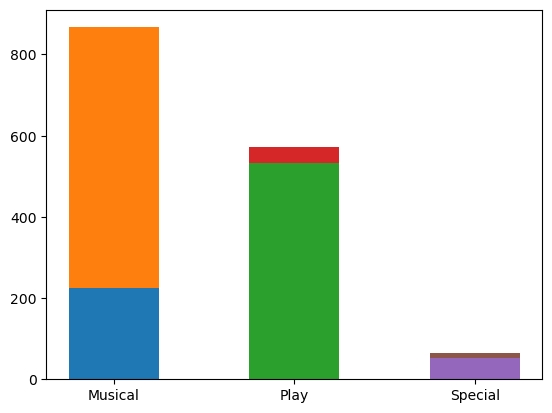

In [98]:
# TODO: Modify the Matplotlib example, using the numpy arrays you created above for the two theaters as the counts items
fig, ax = plt.subplots()
bottom = 0;
width = 0.5;
show_theatres = ['Walter Kerr', 'Neil Simon'];

for i,j in zip(show_type, range(len(show_type))):
    wk = show_count[j]
    ns = show_count1[j]
    ax.bar(i, wk, width, bottom)
    bottom = bottom + wk
    ax.bar(i, ns, width, bottom)
    bottom = 0;
    print(wk)
    print(ns)
   

### Pie Chart

Pie chart is an intuitive way to see proportions in data. We can create a pie chart to see how much each show name contributes to the gross revenue of a given theatre, for example the "Criterion" theatre.

In [105]:
# We only need the data for Criterion, and only the show names and gross revenue columns
criterionGross = shows[shows["Show.Theatre"]=="Criterion"][[ "Show.Name", "Statistics.Gross" ]]

# Group by show names and aggregate for the total revenue
revenueByShows = criterionGross.groupby( "Show.Name" ).sum( numeric_only=True )
revenueByShows

,Statistics.Gross
Show.Name,
1776,3119167
A Month In The Country,320994
A Thousand Clowns,1019814
A View From The Bridge,1945902
Company 95,173012
Little Me,3266231
London Assurance,1493967
Side Man,2071842
Summer And Smoke,1194418


A pie chart can be created using the `pyplot.pie` function.

([<matplotlib.patches.Wedge at 0x151527ed0>,
 [Text(0.9821107803111936, 0.4954375997000414, '1776'),
  Text(0.6104367659489507, 0.9150775676289885, 'A Month In The Country'),
  Text(0.41561986444936333, 1.0184596841677598, 'A Thousand Clowns'),
  Text(-0.062410916699023766, 1.098228062597559, 'A View From The Bridge'),
  Text(-0.40203326996626015, 1.0238990427968162, 'Company 95'),
  Text(-0.8542993739447517, 0.6929448604886289, 'Little Me'),
  Text(-1.099453358763443, -0.034674369551358525, 'London Assurance'),
  Text(-0.9286706915104048, -0.5895513096665859, 'Side Man'),
  Text(-0.5426625908874464, -0.9568266888268346, 'Summer And Smoke'),
  Text(-0.14304471442663638, -1.0906595296767008, 'The Deep Blue Sea'),
  Text(0.41893069427074897, -1.0171022924946285, 'The Lion In Winter'),
  Text(0.7171276861190239, -0.8341030402783429, "The Play'S The Thing"),
  Text(0.8526564976519666, -0.6949653926720971, 'The Rehearsal'),
  Text(1.0641594250299964, -0.2785044310595932, 'Three Sisters')],


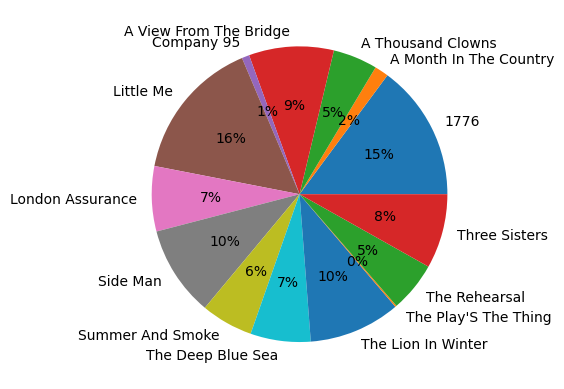

In [106]:
plt.pie( revenueByShows[ "Statistics.Gross" ], labels = revenueByShows.index, autopct = '%0.0f%%' )

__EXERCISE:__

Create a pie chart to visualize the proportion of total attendance in each show name, for the "Winter Garden" theatre.

([<matplotlib.patches.Wedge at 0x1517a3010>,
 [Text(0.5054299413043228, 0.9770059234380869, 'Cats'),
  Text(-0.8039417677020986, -0.7507846789486485, 'Mamma Mia!'),
  Text(0.9252714118425563, -0.5948720992170358, 'Rocky'),
  Text(1.0573688877588032, -0.303267266944047, 'School Of Rock'),
  Text(1.0986198009866517, -0.05508659437694511, 'Wolf Hall Parts One & Two')])

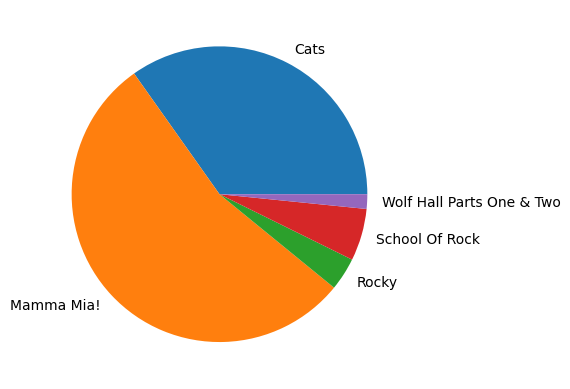

In [131]:
# TODO: Create a pie chart to visualize the proportion of total attendance in each show name, for the "Winter Garden" theatre

Winter_Garden = shows[[ "Show.Name", "Statistics.Attendance" ]][shows["Show.Theatre"] == "Winter Garden"]
Winter_Garden_Attendance = Winter_Garden.groupby("Show.Name").sum( numeric_only=True )
Winter_Garden_Attendance

plt.pie( Winter_Garden_Attendance[ "Statistics.Attendance" ], labels = Winter_Garden_Attendance.index)

# Introduction to Seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn is a complement, not a substitute to Matplotlib, but it makes a few-well defined hard usual tasks easy to do. 


## Overview of Seaborn's Plotting Functionality

Seaborn organizes plotting functions into __modules__ of functions that achieve similar visualization goals through different means. 

The most commonly used modules are _relational_ (for visualizing statistical relationships), _distributional_ (for visualizing distributions), and _categorical_ (for visualizing categorical data). Other than these, there are also _regression_ plots and _matrix_ plots, as listed in the [documentation](https://seaborn.pydata.org/api.html#function-interface).

In addition to these modules, there is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. 

__Axes-level__ functions make self-contained plots. They act like drop-in replacements for matplotlib functions, plotting data onto a single ```matplotlib.pyplot.Axes``` object. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into.

In contrast, __figure-level__ functions interface with Matplotlib through a Seaborn object, usually a `FacetGrid`, that manages the figure. Because these functions "own" their own figure, they can implement features such as putting the legend outside of the plot.

Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The high-level view as available on the tutorial website is:
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

## Visualization with Seaborn

The ```set_theme``` function sets the matplotlib parameters and hence the theme will now apply to all plots using matplotlib - whether plotted through seaborn or not. This is also the default theme.

In [134]:
import seaborn as sns

sns.set_theme()

## Relational Functions

Let us look at a few plots that belong to the relational module, and get a sense of how we use axes-level functions (e.g., `scatterplot`) compared to how we use the corresponding figure-level function (i.e., `relplot`).

### Scatterplot

Using Seaborn's axes-level `scatterplot` function, we can easily recreate the scatter plot of gross revenue against attendance that we did previously using matplotlib, albeit with different colors.

Unlike when using matplotlib directly, it is not necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, seaborn handles the translation from values in the dataframe to arguments that matplotlib understands.

__EXERCISE:__

Refer to the [`scatterplot` API reference](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to visualize how gross revenue changes with attendance numbers, for shows after the year 2015, using different colors for different show types.

_Hint:_ What arguments should you specify to the function as `data`, `x`, `y`, and `hue`?

(984, 12)


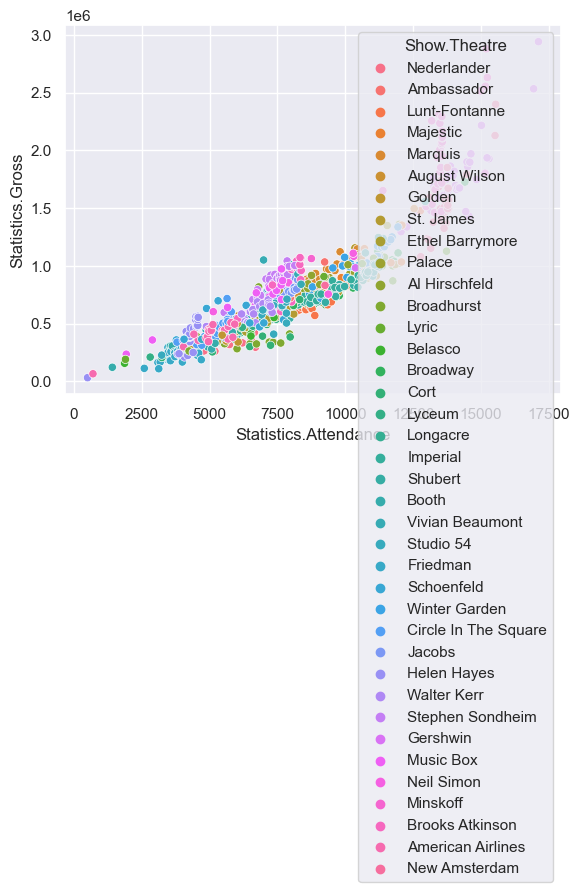

In [155]:
# TODO: Use Seaborn scatterplot to visualize gross revenue vs attendance for shows after 2015, color-differentiated by show types

showsAfter2005 = shows[shows['Date.Year']>2015]
print(showsAfter2005.shape)
showsAfter2005_Attendance = showsAfter2005['Statistics.Attendance']
showsAfter2005_Gross = showsAfter2005['Statistics.Gross']

seaborn_scatter = sns.scatterplot(data=showsAfter2005,x='Statistics.Attendance',y='Statistics.Gross', hue='Show.Theatre')

### Relplot

Alternatively, we can use the figure-level function `relplot` to visualize the same relationship of gross revenue against attendance. 

Figure-level functions are powerful in visualising additional variables, such as the theatre and the show type, which can easily be specified within the same function.

__EXERCISE:__

Refer to the [`relplot` API reference](https://seaborn.pydata.org/generated/seaborn.relplot.html) for the syntax, and use `relplot` to visualize how gross revenue changes with attendance numbers, for shows after the year 2015. Use the `hue` and `style` arguments to visualize the different theatres and show types respectively.

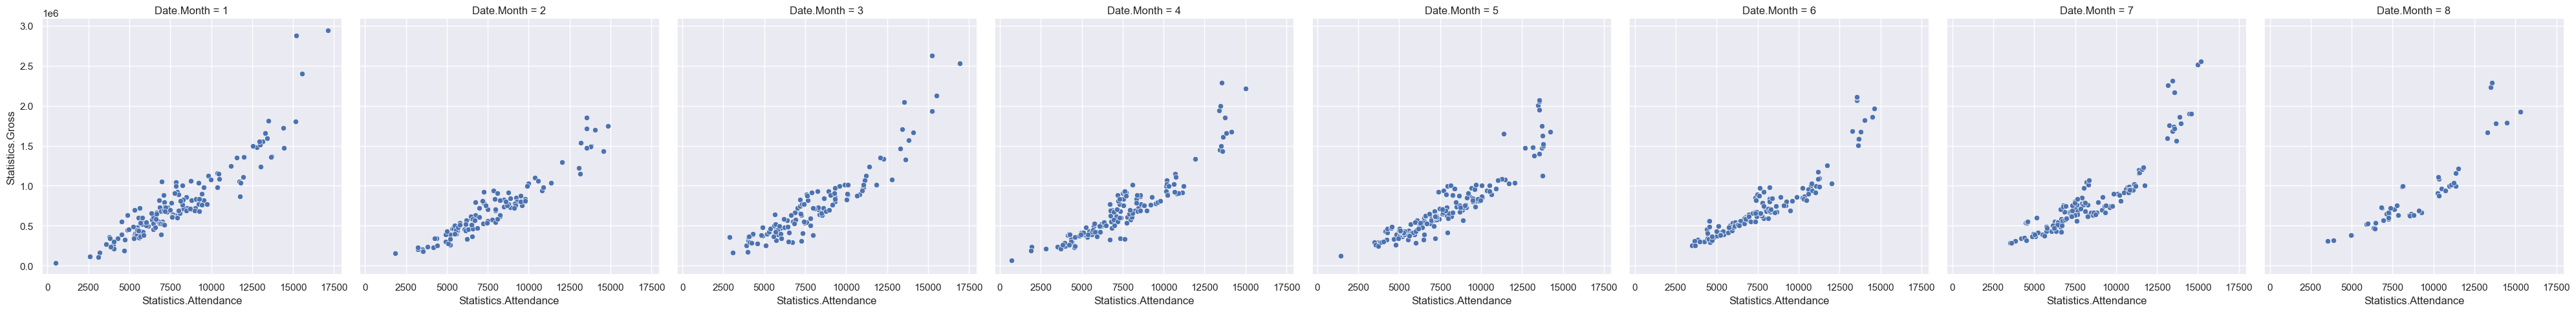

In [158]:
# TODO: Use relplot to visualize gross against attendance of shows after 2015, further differentiating the display by theatres and show types

seaborn_relplot = sns.relplot(data=showsAfter2005,x='Statistics.Attendance',y='Statistics.Gross', col='Date.Month')


As we know, too much information becomes difficult to understand in a single plot. However, the aim here is to demonstrate how easy it is to create the plot using seaborn.

### Estimating Regression Fits using `lmplot`

Aside from the axes-level vs figure-level usage, the scatter plot in the above exercises can be further enhanced using Seaborn `lmplot` to include a linear regression model (and its uncertainty). 

In the simplest invocation, the `lmplot` function draws a scatter plot of two variables, `x` and `y`, and then fit the regression model `y` ~ `x` and plot the resulting regression line and a 95% confidence interval for that regression.

__EXERCISE:__

Refer to the [`lmplot` API reference](https://seaborn.pydata.org/generated/seaborn.lmplot.html) for the syntax, and use it to fit the regression model for the above scatter plot of gross revenue vs attendance of shows after 2015.

_Hint:_ What arguments should you specify to the function as `data`, `x`, and `y`?

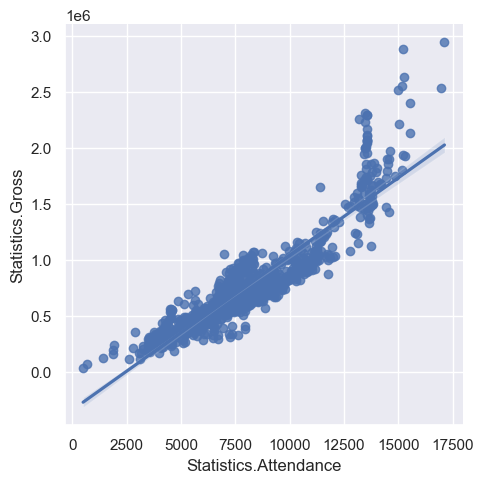

In [160]:
# TODO: Use Seaborn lmplot to fit the regression model for gross revenue vs attendance of shows after 2015

seaborn_lmplot = sns.lmplot(data=showsAfter2005,x='Statistics.Attendance',y='Statistics.Gross')


## Distributional Functions

In the distributional module, one of the axes-level function is `kdeplot`, while the figure-level function is `displot`.

### KDE Plot

The ```kdeplot``` function is a kernel density estimate plot to visualise the distribution of observations in a dataset. For example, we can plot the distribution of show types across the years.

<Axes: xlabel='Date.Year', ylabel='Density'>

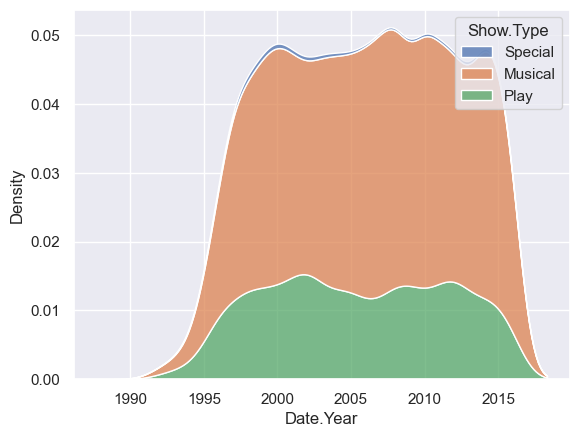

In [161]:
sns.kdeplot( data=shows, x="Date.Year", hue="Show.Type", multiple="stack" )

### Displot

Similar to what we have seen for the relational module, the figure-level function allows us to visualize multiple features very easily.

With the same objective of plotting the distribution of show types across the years, the `displot` function can be used to display bar plots along with distribution estimates (a KDE plot).

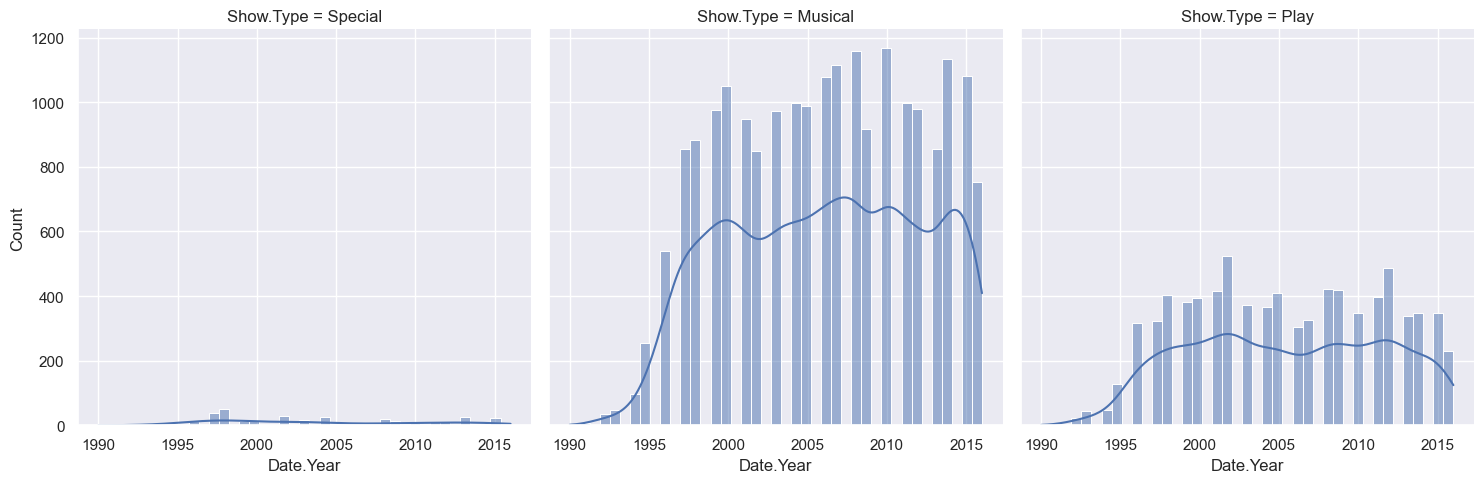

In [162]:
sns.displot( data=shows, x="Date.Year", col="Show.Type", kde=True )

### Jointplot

Seaborn `jointplot` is a function cannot be categorized neatly, as it can be used to plot a relationship between two variables while simultaneously exploring the distribution of each underlying variable.

With the same visualization objectives as previous exercises, let us visualize the relationship between the attendance and gross revenue, along with the distribution of each variable. The show type can simultaneously be shown easily.

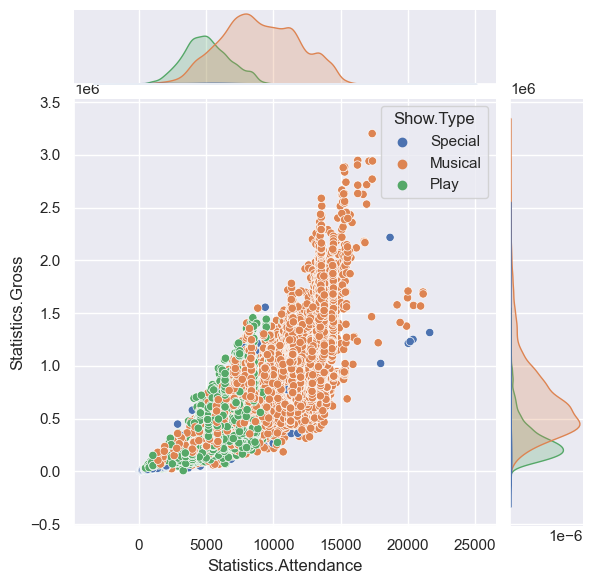

In [163]:
sns.jointplot( data=shows, x="Statistics.Attendance", y="Statistics.Gross", hue="Show.Type" )

## Categorical Functions

Categorical plotting functions visualize the distribution with respect to categories.

Let us prepare our dataset by converting the month and year variables to category for visualization.

In [164]:
shows["Date.Month"] = shows["Date.Month"].astype("category")
shows["Date.Year"] = shows["Date.Year"].astype("category")

### Boxplot

Boxplots are plots that show the distribution of a dataset based on its five-number summary of data points: the minimum, first quartile (Q1), median, third quartile (Q3), and the maximum. Boxplots also show us the outliers, whether the data is symmetrical, how tightly the data is grouped, and if and how the data is skewed.

The axes-level `boxplot` function visualizes boxplots with respect to a categorical variable.

__EXERCISE:__

Suppose we want to see whether show attendance is higher in any particular month. 

Refer to the examples on the [boxplot API reference](https://seaborn.pydata.org/generated/seaborn.boxplot.html) and use `boxplot` to visualize this distribution.

_Hint:_ What is the categorical variable (`y`)? What is the variable whose distribution we want to see (`x`)?

<Axes: xlabel='Statistics.Attendance', ylabel='Date.Month'>

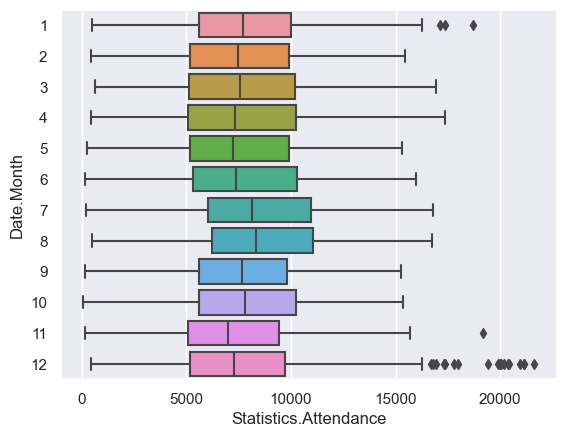

In [165]:
# TODO: Use boxplot to visualize whether show attendance is higher in any particular month

sns.boxplot(data=shows, x='Statistics.Attendance', y = 'Date.Month')

### Countplot

Another axes-level function in the categorical module is `countplot`, which shows the counts of observations in each categorical bin using bars. A countplot can be thought of as a histogram across a categorical, instead of quantitative, variable. 

__EXERCISE:__

Suppose we want to see whether certain show types are more prevalent in any particular month. 

Refer to the examples on the [countplot API reference](https://seaborn.pydata.org/generated/seaborn.countplot.html) and use `countplot` to visualize this distribution.

_Hint:_ What is the categorical variable (`x`)? Which variable occurences do we want to observe (`hue`)?

<Axes: xlabel='Date.Month', ylabel='count'>

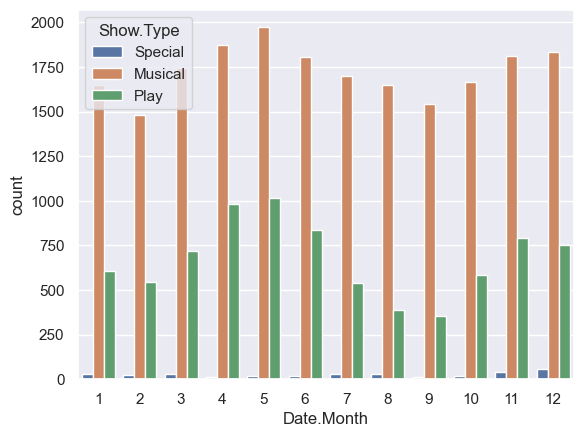

In [173]:
# TODO: Use countplot to visualize whether certain show types are more prevalent in any particular month

sns.countplot(data=shows, x='Date.Month', hue = 'Show.Type')

### Catplot

The figure-level ```catplot``` function provides access to several axes-level categorical plotting functions, enabling visualization of the relationship between a numerical and one or more categorical variables using one of several visual representations.

The ```kind``` parameter selects the underlying axes-level function to use. 

Using `catplot`, it is easy to extend the earlier boxplot to include differentiation by show types.

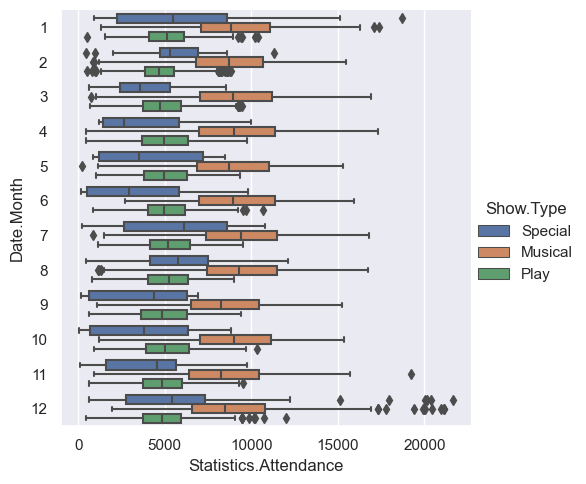

In [174]:
sns.catplot( data=shows, kind="box", x="Statistics.Attendance", y="Date.Month", hue="Show.Type" )

## Extra: Heatmap

The `heatmap` function plots rectangular data as a color-encoded matrix. It can be used to find any correlation between the various numeric data types in the dataset, whether they are negatively or positively correlated and how strongly.

For our Broadway Shows dataset, we can use `corr` to compute pairwise correlation of columns, then visualize this using `heatmap`.

<Axes: >

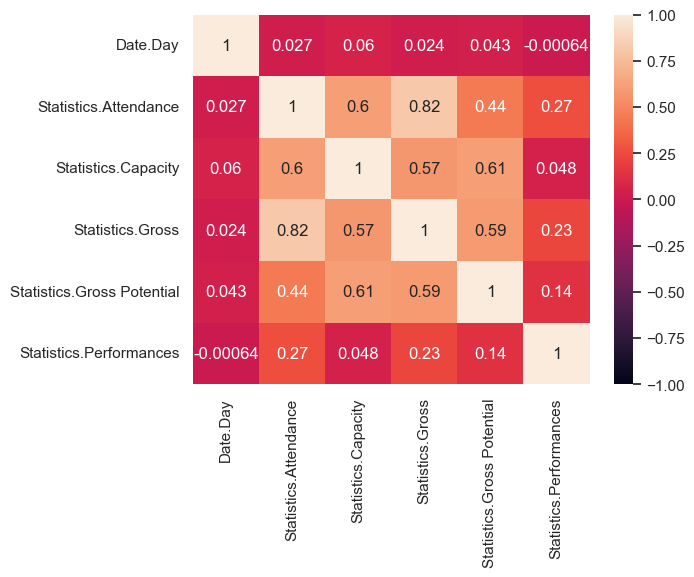

In [175]:
sns.heatmap( shows.corr( numeric_only=True ), vmin=-1, vmax=1, annot=True )

We see relatively high correlation between gross revenue and attendance or filled capacity, which is logical.

# Closing Remarks

We have worked through a number of plots using Matplotlib and Seaborn in this tutorial. These are only a small part of the vast collection of visualization capabilities that the two libraries provide.

As you have done in these exercises, when you encounter a visualization goal, consider the nature of the data and the purpose of the visualization (relational, distributional, and so on), then simply look up the guides and API references of the suitable modules!

In [ ]:
import 